<h2>Titanic project</h2>

<h4>Import essential library</h4>

In [ ]:
# Import Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer , SimpleImputer

# Import Metrics and indicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.compose import ColumnTransformer
from scipy.stats import randint, uniform

# Import Model
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

<h4>Import data</h4>

In [ ]:
# Raw URLs to CSV files
test_data_url = 'https://raw.githubusercontent.com/Yosapatjj/Titanic-ML/fc58eb1c716b1e36399afb3cc16b7b49d4c3416f/test.csv'
train_data_url = 'https://raw.githubusercontent.com/Yosapatjj/Titanic-ML/fc58eb1c716b1e36399afb3cc16b7b49d4c3416f/train.csv'

# Read CSV files into DataFrames
test_data = pd.read_csv(test_data_url)
train_data = pd.read_csv(train_data_url)

<h4>EDA and Data manipulation</h4>

<h5>Train dataset</h5>

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h4>Fill `null` in Age & Embarked column</h4>

In [ ]:
age_median = train_data['Age'].median()
train_data['Age'].fillna(age_median, inplace = True)

embark_mode = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(embark_mode, inplace = True)

<h4>Create "Age category" column from Age</h4>

In [ ]:
bins = [0, 15, 28, 38, 64, float('inf')]
labels = ['A','B', 'C', 'D', 'E']
#labels = ['infant','Teenager', 'Adult', 'Elderly']
train_data['Age_cat'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data['Fare_Person'] = train_data['Fare'] / (train_data['FamilySize']+1)

In [ ]:
selected_column = ['Survived',
                   'Pclass',
                   'Sex',
                   'SibSp',
                   'Parch',
                   #'Age',
                   #'Fare',
                   'Age_cat',
                   #'FamilySize',
                   'Fare_Person'
                   #,'Embarked'
                  ]

# Assuming 'clean_train' contains your feature dataset
# Define categorical and numerical columns
categorical_cols = ['Pclass',
                    'Sex',
                    'Age_cat'#,
                    #'Embarked'
                   ]

numerical_cols = ['SibSp',
                  'Parch',
                  #'Age',
                  #'Fare',
                  #'FamilySize',
                  'Fare_Person'
                 ]

clean_train = train_data[selected_column].copy()
clean_train.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Age_cat,Fare_Person
0,0,3,male,1,0,B,3.62500
1,1,1,female,1,0,D,35.64165
2,1,3,female,0,0,B,7.92500
3,1,1,female,1,0,C,26.55000
4,0,3,male,0,0,C,8.05000
5,0,3,male,0,0,C,8.45830
6,0,1,male,0,0,D,51.86250
7,0,3,male,3,1,A,4.21500
8,1,3,female,0,2,B,3.71110
9,1,2,female,1,0,A,15.03540


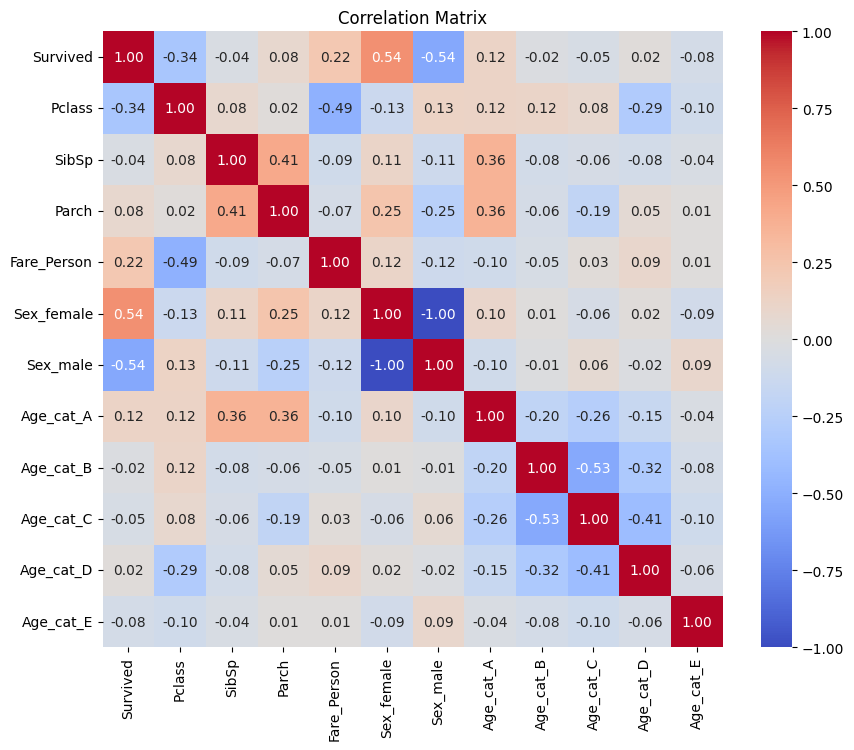

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df_one_hot_encoded = pd.get_dummies(clean_train)

# Calculate correlation matrix
correlation_matrix = df_one_hot_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

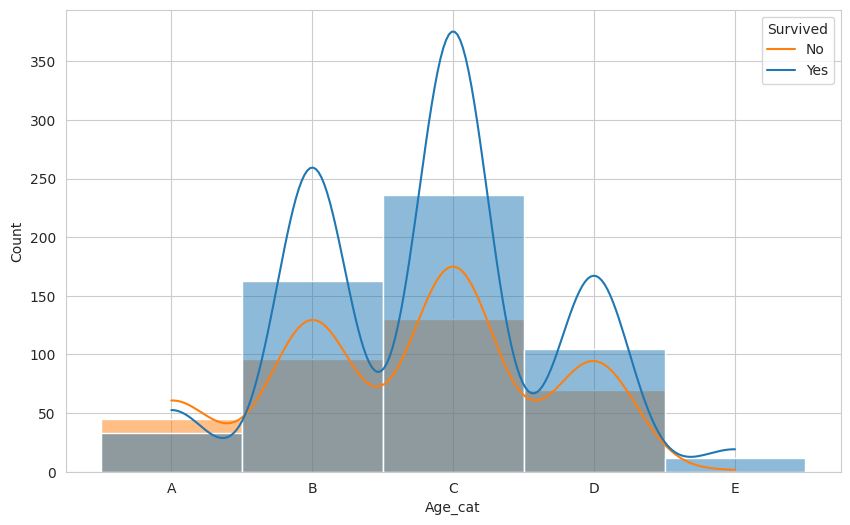

In [ ]:
# Set style
sns.set_style('whitegrid')

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_train, x='Age_cat', hue='Survived', bins=20, kde=True)
#plt.title('Age Distribution by Survival')
#plt.xlabel('Age')
#plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<h5>Test dataset</h5>

In [ ]:
# @title
test_data.isnull().sum()

In [ ]:
# @title
age_median = test_data['Age'].median()
test_data['Age'].fillna(age_median, inplace = True)

In [ ]:
# @title
bins = [0, 5, 20, 30, 60, float('inf')]
labels = ['Kid', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
test_data['Age_cat'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)

selected_column = ['Pclass','Sex','SibSp','Parch','Fare','Age_cat']
clean_test = test_data[selected_column].copy()
clean_test.head(10)

In [ ]:
# @title
# Define the categorical data in the data
categorical_columns = ['Pclass', 'Sex', 'Age_cat']

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(clean_train[categorical_columns])

# Split data into features and target variable
x = encoded_data
y = clean_train['Survived']

# Split data into train, validation, and test sets
# Train data is 80% of dataset || Test data is at 20%
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=77)

# Split 0.25 of Test data will be use as validation dataset
x_val,   x_test, y_val,   y_test = train_test_split(x_temp, y_temp, test_size=0.25, random_state=77)

<h3>Model Selection</h3>

In [ ]:
# Define preprocessing steps for numerical and categorical data
# Standardize numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical features
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numeric_transformer, numerical_cols),
                  ('cat', categorical_transformer, categorical_cols)
                 ])

# Apply preprocessing to your data
X = clean_train[numerical_cols + categorical_cols]
y = clean_train['Survived']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Preprocess the training and testing data
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

# Define the models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=77),
    'RandomForestClassifier': RandomForestClassifier(random_state=77),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=77),
    'XGBClassifier': XGBClassifier(random_state=77),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=77),
    'GaussianNB': GaussianNB()
}

# Define scoring metrics
scoring_list = {
    'Accuracy' : 'accuracy',
    'Precision': 'precision_macro',
    'True Positive Rate'   : 'recall_macro',
    'F1 Score' : 'f1_macro'
}

# Store results in a list of lists
results = []

# Perform cross-validation and compute evaluation metrics for each model
for model_name, model in models.items():
    row = [model_name]
    for _, scoring_metric in scoring_list.items():
        cv_scores = cross_val_score(model, x_train, y_train, cv=3, scoring=scoring_metric)
        row.append(f"{cv_scores.mean():.4f}")
    results.append(row)

# Define table headers
headers = ['Model', 'Accuracy', 'Precision', 'True Positive Rate', 'F1 Score']

# Store results in a dictionary
results_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'True Positive Rate': [], 'F1 Score': []}

# Perform cross-validation and compute evaluation metrics for each model
for model_name, model in models.items():
    results_dict['Model'].append(model_name)
    for metric_name, scoring_metric in scoring_list.items():
        cv_scores = cross_val_score(model, x_train, y_train, cv=3, scoring=scoring_metric)
        results_dict[metric_name].append(cv_scores.mean())

# Create DataFrame
results_df = pd.DataFrame(results_dict)

### Sort the DataFrame by Accuracy column
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Convert Accuracy to percentage
results_df_sorted['Accuracy']  = round(results_df_sorted['Accuracy']  * 100,3)
results_df_sorted['Precision'] = round(results_df_sorted['Precision'] * 100,3)
results_df_sorted['True Positive Rate'] = round(results_df_sorted['True Positive Rate'] * 100,3)
results_df_sorted['F1 Score']  = round(results_df_sorted['F1 Score']  * 100,3)

results_df_sorted

,Model,Accuracy,Precision,True Positive Rate,F1 Score
1,SVC,82.584,82.477,80.927,81.467
5,GradientBoostingClassifier,81.462,81.073,80.282,80.509
4,KNeighborsClassifier,81.459,80.798,80.630,80.665
3,RandomForestClassifier,80.620,80.146,79.229,79.524
6,XGBClassifier,80.616,80.081,79.521,79.683
2,DecisionTreeClassifier,79.351,78.746,77.999,78.259
0,LogisticRegression,79.215,78.773,78.113,78.151
7,AdaBoostClassifier,78.937,78.290,78.114,77.957
8,GaussianNB,67.308,74.558,70.497,64.295


1. Accuracy measures the proportion of correct predictions among all predictions made by the model.
It is calculated as the ratio of the number of correct predictions to the total number of predictions.
Accuracy = (TP + TN) / (TP + TN + FP + FN)
<br>⚪️ TP (True Positives) is the number of instances that are correctly predicted as positive.
<br>⚪️ TN (True Negatives) is the number of instances that are correctly predicted as negative.
<br>⚪️ FP (False Positives) is the number of instances that are incorrectly predicted as positive.
<br>⚪️ FN (False Negatives) is the number of instances that are incorrectly predicted as negative.

2. Precision measures the proportion of true positive predictions among all positive predictions made by the model.
It is calculated as the ratio of the number of true positive predictions to the total number of positive predictions made by the model.
<br>⚪️ Precision = TP / (TP + FP)</br>
⚪️ Precision is high when the model makes fewer false positive predictions.

3. Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
It is calculated as the ratio of the number of true positive predictions to the total number of actual positive instances in the dataset.
<br>⚪️ Recall = TP / (TP + FN)</br>
⚪️ Recall is high when the model correctly identifies most of the positive instances.

4. F1 Score is the harmonic mean of precision and recall.
It provides a single metric that balances between precision and recall.
<br>⚪️ F1 Score = 2 * (Precision * Recall) / (Precision + Recall)</br>
⚪️ F1 Score is high when both precision and recall are high. It is a useful metric when there is an uneven class distribution or when false positives and false negatives have different costs.

<h2>Tuning 3 Highest Accuracy Models</h2>

<h3>Grid Search</h3>

<h5>
1. SVC
<br>2. Gradient Boosting Classifier
<br>3. XGB Classifier
</h5>

In [ ]:
#=========================================================
#----- PART I: Define parameter grid for Grid Search -----
#=========================================================
# 1. Grid for SVC model
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly']
}
# 2. Grid for GBC model
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
# 3. Grid for XGBC model
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
} #________________________________________________________


#=========================================================
# ---- PART II: Define parameter grid for Grid Search ----
#=========================================================
models2 = {
    'Grid SVC' : SVC(random_state=77),
    'Grid GBC' : GradientBoostingClassifier(random_state=77),
    'Grid XGBC': XGBClassifier(random_state=77),
} #_______________________________________________________


#========================================================
# ---------- PART III: Initialize GridSearchCV ----------
#========================================================
grid_search_svc = GridSearchCV(estimator=models2['Grid SVC'], param_grid=param_grid_svc, cv=3, scoring='accuracy')
grid_search_gb = GridSearchCV(estimator=models2['Grid GBC'], param_grid=param_grid_gb, cv=3, scoring='accuracy')
grid_search_xgb = GridSearchCV(estimator=models2['Grid XGBC'], param_grid=param_grid_xgb, cv=3, scoring='accuracy')
#________________________________________________________


#==============================================
# ---------- PART IV: Fit the models ----------
#==============================================
grid_search_svc.fit(x_train, y_train)
grid_search_gb.fit(x_train, y_train)
grid_search_xgb.fit(x_train, y_train)
# _____________________________________________


#============================================================
# ----- PART V: Get the best estimator from grid search -----
#============================================================
best_grid_svc = grid_search_svc.best_estimator_
best_grid_gbc = grid_search_gb.best_estimator_
best_grid_xgb = grid_search_xgb.best_estimator_
# ___________________________________________________________


#===============================================================================
#------------- PART VI: Run the model and cross valuate the model --------------
#===============================================================================
# Define scoring metrics
scoring_list = {
    'Accuracy' : 'accuracy',
    'Precision': 'precision_macro',
    'True Positive Rate'   : 'recall_macro',
    'F1 Score' : 'f1_macro'
}

# Store results in a list of lists
results = []

# Perform cross-validation and compute evaluation metrics for each model
for model_name, model in models2.items():
    row = [model_name]
    for _, scoring_metric in scoring_list.items():
        cv_scores = cross_val_score(model, x_train, y_train, cv=3, scoring=scoring_metric)
        row.append(f"{cv_scores.mean():.4f}")
    results.append(row)

# Define table headers
headers = ['Model', 'Accuracy', 'Precision', 'True Positive Rate', 'F1 Score']

# Store results in a dictionary
results_dict2 = {'Model': [], 'Accuracy': [], 'Precision': [], 'True Positive Rate': [], 'F1 Score': []}

# Perform cross-validation and compute evaluation metrics for each model
for model_name, model in models2.items():
    results_dict2['Model'].append(model_name)
    for metric_name, scoring_metric in scoring_list.items():
        cv_scores = cross_val_score(model, x_train, y_train, cv=3, scoring=scoring_metric)
        results_dict2[metric_name].append(cv_scores.mean())
#_______________________________________________________________________________

# Create DataFrame
results_df2 = pd.DataFrame(results_dict2)

In [ ]:
### Sort the DataFrame by Accuracy column
results_df_sorted2 = results_df2.sort_values(by='Accuracy', ascending=False)

# Convert Accuracy to percentage
results_df_sorted2['Accuracy']  = round(results_df_sorted2['Accuracy']  * 100,3)
results_df_sorted2['Precision'] = round(results_df_sorted2['Precision'] * 100,3)
results_df_sorted2['True Positive Rate'] = round(results_df_sorted2['True Positive Rate'] * 100,3)
results_df_sorted2['F1 Score']  = round(results_df_sorted2['F1 Score']  * 100,3)

results_df_sorted2

In [ ]:
#=========================================================
# ----- PART I: Define parameter grid for Random Search --
#=========================================================
# 1. Grid for SVC model
param_dist_svc = {
    'C': uniform(0.1, 20), # Continuous uniform distribution between 0.1 and 100
    'gamma': uniform(0.1, 20), # Continuous uniform distribution between 0.1 and 100
    'kernel': ['rbf', 'linear', 'poly']
}
# 2. Grid for GBC model
param_dist_gb = {
    'n_estimators': randint(10, 30), # Discrete uniform distribution between 100 and 300
    'learning_rate': uniform(0.01, 0.2), # Continuous uniform distribution between 0.01 and 0.2
    'max_depth': randint(3, 6) # Discrete uniform distribution between 3 and 5
}
# 3. Grid for XGBC model
param_dist_xgb = {
    'n_estimators': randint(10, 30), # Discrete uniform distribution between 100 and 300
    'learning_rate': uniform(0.01, 0.2), # Continuous uniform distribution between 0.01 and 0.2
    'max_depth': randint(3, 6) # Discrete uniform distribution between 3 and 5
} #________________________________________________________


#=========================================================
# ---- PART II: Define parameter grid for Random Search --
#=========================================================
models3 = {
    'Rand SVC' : SVC(random_state=77),
    'Rand GBC' : GradientBoostingClassifier(random_state=77),
    'Rand XGBC': XGBClassifier(random_state=77),
} #_______________________________________________________


#========================================================
# ---------- PART III: Initialize RandomizedSearchCV ----
#========================================================
random_search_svc = RandomizedSearchCV(estimator=models3['Rand SVC'],
                                       param_distributions=param_dist_svc,
                                       n_iter=10, cv=3, scoring='accuracy',
                                       random_state=77)

random_search_gb = RandomizedSearchCV(estimator=models3['Rand GBC'],
                                      param_distributions=param_dist_gb,
                                      n_iter=10, cv=3, scoring='accuracy',
                                      random_state=77)

random_search_xgb = RandomizedSearchCV(estimator=models3['Rand XGBC'],
                                       param_distributions=param_dist_xgb,
                                       n_iter=10, cv=3, scoring='accuracy',
                                       random_state=77)
#________________________________________________________


#==============================================
# ---------- PART IV: Fit the models ----------
#==============================================
random_search_svc.fit(x_train, y_train)
random_search_gb.fit(x_train, y_train)
random_search_xgb.fit(x_train, y_train)
# _____________________________________________


#============================================================
# ----- PART V: Get the best estimator from random search ---
#============================================================
best_random_svc = random_search_svc.best_estimator_
best_random_gb = random_search_gb.best_estimator_
best_random_xgb = random_search_xgb.best_estimator_
# ___________________________________________________________


#===============================================================================
#------------- PART VI: Run the model and cross valuate the model --------------
#===============================================================================
# Define scoring metrics
scoring_list = {
    'Accuracy' : 'accuracy',
    'Precision': 'precision_macro',
    'True Positive Rate'   : 'recall_macro',
    'F1 Score' : 'f1_macro'
}

# Store results in a dictionary
results_dict3 = {'Model': [], 'Accuracy': [], 'Precision': [], 'True Positive Rate': [], 'F1 Score': []}

# Perform cross-validation and compute evaluation metrics for each model
for model_name, model in models3.items():
    results_dict3['Model'].append(model_name)
    for metric_name, scoring_metric in scoring_list.items():
        cv_scores = cross_val_score(model, x_train, y_train, cv=3, scoring=scoring_metric)
        results_dict3[metric_name].append(f"{cv_scores.mean():.4f}")

# Create DataFrame
results_df3 = pd.DataFrame(results_dict3)

In [ ]:
results_df_sorted3 = results_df3.sort_values(by='Accuracy', ascending=False)

# Convert Accuracy to percentage
results_df_sorted3['Accuracy']  = pd.to_numeric(results_df_sorted3['Accuracy']) * 100
results_df_sorted3['Precision'] = pd.to_numeric(results_df_sorted3['Precision']) * 100
results_df_sorted3['True Positive Rate'] = pd.to_numeric(results_df_sorted3['True Positive Rate']) * 100
results_df_sorted3['F1 Score']  = pd.to_numeric(results_df_sorted3['F1 Score']) * 100

results_df_sorted3

,Model,Accuracy,Precision,True Positive Rate,F1 Score
0,Rand SVC,82.02,82.05,80.17,80.77
1,Rand GBC,81.46,81.46,79.99,80.36
2,Rand XGBC,79.92,79.33,78.76,78.93
